In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D,Dropout,Flatten,Dense,MaxPool2D,SeparableConv2D,BatchNormalization
from keras.models import Sequential,Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
#   Initializing parameters
n_classes=10
batch_size = 64
epochs=10


Using TensorFlow backend.


In [2]:
#   Load data
(x_train,y_train),((x_test,y_test))=cifar10.load_data()
print("Training data samples : ",x_train.shape[0])
print("Test data samples : ",x_test.shape[0])
#   Data Normalization
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
print(x_train.shape)


Training data samples :  50000
Test data samples :  10000
(50000, 32, 32, 3)


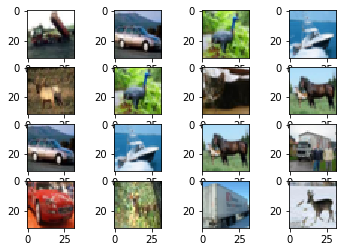

In [3]:
from matplotlib import pyplot
from scipy.misc import toimage
from keras.datasets import cifar10
pyplot.figure(1)
for i in range(0,4):
    for j in range(0,4):
        pyplot.subplot2grid((4,4),(i,j))
        pyplot.imshow(toimage(x_train[(i+2)*(j+1)]))
    # show the plot
pyplot.show()
 


In [4]:
#   Perform one-hot enconding to labels
y_train=keras.utils.to_categorical(y_train,n_classes)
y_test=keras.utils.to_categorical(y_test,n_classes)
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [5]:
#   Construct the model
#1st Block
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=x_train.shape[1:]))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
#2nd Block
model.add(SeparableConv2D(64,kernel_size=(3,3),activation='relu',padding='same',input_shape=x_train.shape[1:]))
model.add(SeparableConv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
#3rd Block
model.add(SeparableConv2D(128,kernel_size=(3,3),activation='relu',padding='same',input_shape=x_train.shape[1:]))
model.add(SeparableConv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
'''
#4th Block
model.add(SeparableConv2D(64,kernel_size=(3,3),activation='relu',padding='same',input_shape=x_train.shape[1:]))
model.add(SeparableConv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
#5th Block
model.add(SeparableConv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=x_train.shape[1:]))
model.add(SeparableConv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

'''
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(n_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 16, 16, 64)        2400      
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 16, 16, 64)        4736      
_________________________________________________________________
max_

In [6]:

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#training
 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist=model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] / batch_size,epochs=epochs,
                    verbose=1,validation_data=(x_test,y_test))

 

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
782/781 [==============================] - 111s 142ms/step - loss: 1.3893 - acc: 0.4983 - val_loss: 1.2755 - val_acc: 0.5637
Epoch 2/10
782/781 [==============================] - 108s 138ms/step - loss: 1.0794 - acc: 0.6160 - val_loss: 1.3013 - val_acc: 0.5643
Epoch 3/10
782/781 [==============================] - 109s 139ms/step - loss: 0.9500 - acc: 0.6669 - val_loss: 1.0215 - val_acc: 0.6600
Epoch 4/10
782/781 [==============================] - 109s 139ms/step - loss: 0.8675 - acc: 0.6959 - val_loss: 1.1185 - val_acc: 0.6359
Epoch 5/10
782/781 [==============================] - 108s 138ms/step - loss: 0.8091 - acc: 0.7167 - val_loss: 0.9238 - val_acc: 0.6888
Epoch 6/10
782/781 [==============================] - 108s 138ms/step - loss: 0.7713 - acc: 0.7309 - val_loss: 0.9245 - val_acc: 0.6795
Epoch 7/10
782/781 [==============================] - 108s 138ms/step - loss: 0.7360 - acc: 0.7423 - val_loss: 0.8711 - val_acc: 0.6962


In [7]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test Accuracy: %.3f Test loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 8s 754us/step
Test Accuracy: 76.650 Test loss: 0.696


In [8]:
#Save model weights 
model.save_weights('model.h5') 